<a href="https://colab.research.google.com/github/erandiranthilake/CIFAR10_Image_classification/blob/main/model_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

import keras
import numpy as np
from keras import backend as K
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

print('Train Data: ', x_train.shape, y_train.shape)
print('Test Data: ', x_test.shape, y_test.shape)

170500096/170498071 [==============================] - 2s 0us/step
Train Data:  (50000, 32, 32, 3) (50000, 1)
Test Data:  (10000, 32, 32, 3) (10000, 1)


In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(4, (7, 7), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(8, (7, 7), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(16, (7, 7), padding='same', activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

test1_loss, test1_acc = model.evaluate(x_test, y_test)

Epoch 1/10
1563/1563 [==============================] - 99s 63ms/step - loss: 1.8573 - accuracy: 0.3204 - val_loss: 1.4141 - val_accuracy: 0.4896
Epoch 2/10
1563/1563 [==============================] - 101s 65ms/step - loss: 1.3977 - accuracy: 0.4986 - val_loss: 1.2701 - val_accuracy: 0.5450
Epoch 3/10
1563/1563 [==============================] - 100s 64ms/step - loss: 1.2716 - accuracy: 0.5455 - val_loss: 1.3332 - val_accuracy: 0.5277
Epoch 4/10
1563/1563 [==============================] - 99s 63ms/step - loss: 1.1893 - accuracy: 0.5755 - val_loss: 1.2001 - val_accuracy: 0.5736
Epoch 5/10
1563/1563 [==============================] - 104s 67ms/step - loss: 1.1099 - accuracy: 0.6043 - val_loss: 1.2561 - val_accuracy: 0.5555
Epoch 6/10
1563/1563 [==============================] - 99s 64ms/step - loss: 1.0581 - accuracy: 0.6203 - val_loss: 1.2039 - val_accuracy: 0.5799
Epoch 7/10
1563/1563 [==============================] - 99s 63ms/step - loss: 0.9993 - accuracy: 0.6440 - val_loss: 1.180

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history2 = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
test2_loss, test2_acc = model.evaluate(x_test, y_test)

Epoch 1/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.6900 - accuracy: 0.3841 - val_loss: 1.1461 - val_accuracy: 0.5933
Epoch 2/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.0900 - accuracy: 0.6180 - val_loss: 0.9849 - val_accuracy: 0.6510
Epoch 3/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.8996 - accuracy: 0.6854 - val_loss: 0.8895 - val_accuracy: 0.6891
Epoch 4/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7724 - accuracy: 0.7303 - val_loss: 0.8839 - val_accuracy: 0.6933
Epoch 5/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.6987 - accuracy: 0.7582 - val_loss: 0.8605 - val_accuracy: 0.7043
Epoch 6/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.6176 - accuracy: 0.7832 - val_loss: 0.8207 - val_accuracy: 0.7239
Epoch 7/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.5651 - accuracy: 0.8035 - val_loss: 0.8523 -



Average Accuracy model 1 =  59.32000279426575 %
Average Accuracy model 2 =  71.60000205039978 %





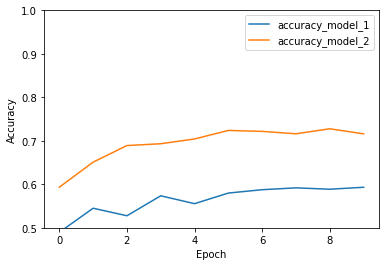

In [8]:
plt.plot(history.history['val_accuracy'], label = 'accuracy_model_1')
plt.plot(history2.history['val_accuracy'], label = 'accuracy_model_2')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='upper right')



print("\n\nAverage Accuracy model 1 = ", test1_acc*100,"%")
print("Average Accuracy model 2 = ", test2_acc*100,"%")

print("\n\n")